In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Feature selection using Lasso

In [63]:
df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [64]:
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df['Outcome'],test_size=0.2,random_state=1)

In [65]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)



(614, 8)
(154, 8)
(614,)
(154,)


In [66]:
la = Lasso(alpha=0.1)
ss = StandardScaler()

In [67]:
x_train_scaled =ss.fit_transform(x_train)
x_test_scaled = ss.fit_transform(x_test)
col = x_train.columns

In [68]:
x_train1 = pd.DataFrame(x_train_scaled,columns=col)
x_test1 = pd.DataFrame(x_test,columns=col)
x_train1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.516591,0.750524,0.564756,1.652015,0.437496,0.795825,0.529526,0.567932
1,1.812018,0.244752,-0.347904,1.020973,-0.678474,1.228654,-0.069689,0.398450
2,0.925736,-0.608739,0.260536,1.273390,0.222886,0.704013,-0.794249,0.991638
3,1.221164,-0.039745,0.463350,-1.250779,-0.678474,-0.896139,-0.167519,2.601722
4,-0.551400,-0.039745,0.361943,1.084077,0.222886,1.031914,-0.760619,-0.364222
...,...,...,...,...,...,...,...,...
609,-0.551400,1.129853,0.260536,0.957869,3.098656,0.992566,-1.008254,-0.279481
610,0.925736,2.078175,-0.956345,0.831660,2.686605,0.271185,1.107339,0.059484
611,2.698300,0.149919,1.071790,-1.250779,-0.678474,1.517206,0.364436,0.737415
612,0.039454,1.572403,0.159129,-1.250779,-0.678474,1.543438,0.046486,-0.618446


In [69]:
la.fit(x_train1,y_train)

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [70]:
la.coef_

array([ 0.        ,  0.1267733 , -0.        ,  0.        ,  0.        ,
        0.00480181,  0.        ,  0.        ])

In [71]:
col

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [72]:
pd.DataFrame(la.coef_,col)

,0
Pregnancies,0.000000
Glucose,0.126773
BloodPressure,-0.000000
SkinThickness,0.000000
Insulin,0.000000
BMI,0.004802
DiabetesPedigreeFunction,0.000000
Age,0.000000


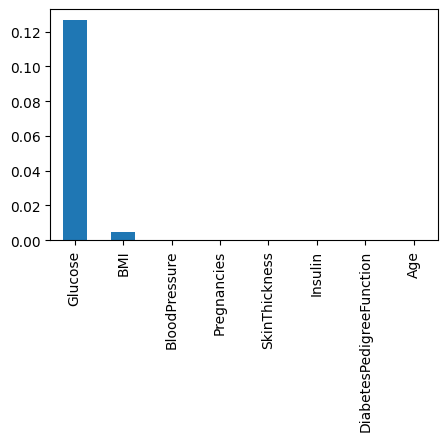

In [74]:
plt.figure(figsize=(5,3))
x = pd.Series(np.abs(la.coef_),index=col)
x.sort_values(ascending=False).plot(kind='bar');